# multiple linear regression
Equation

 Salary = i1*age+i2*distance+i3*Yearsofexperience+b

In [1]:
from sklearn.linear_model import LinearRegression
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')


In [2]:
# import your data
df = pd.read_csv("ml_data_salary.csv")
df.head()

,age,distance,YearsExperience,Salary
0,31.1,77.75,1.1,39343
1,31.3,78.25,1.3,46205
2,31.5,78.75,1.5,37731
3,32.0,80.00,2.0,43525
4,32.2,80.50,2.2,39891


In [3]:
# Set independent and dependent variables
x = df[["age", "YearsExperience"]]
y = df["Salary"]


In [4]:
x.head()

,age,YearsExperience
0,31.1,1.1
1,31.3,1.3
2,31.5,1.5
3,32.0,2.0
4,32.2,2.2


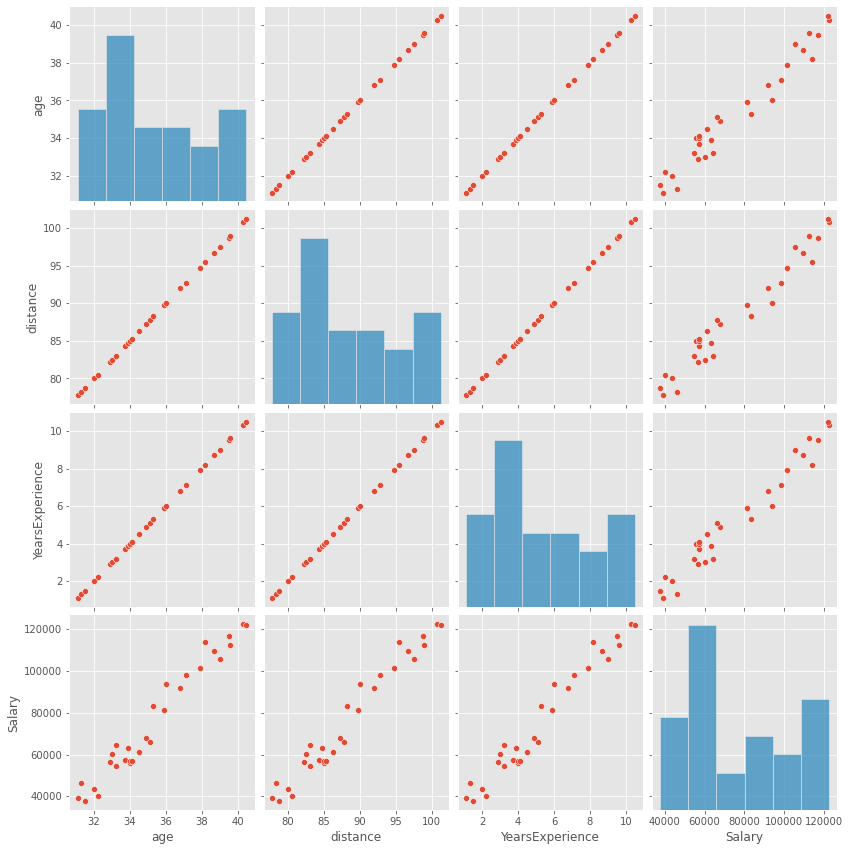

In [5]:
# Visualize the data using scatter plot and histogram
sns.pairplot(data=df, height=3)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)




In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
model

LinearRegression()

In [8]:
# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(x, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -4.170506566370116e+17
Coefficients: [ 1.39016886e+16 -1.39016886e+16]


In [9]:
# Values to predict
age = input('What is your age? \n')
yearofe = input('your experience in years? \n')

try:
    print('We predict {:.0f} that much of your selary if you are {} year old and you have {} year of experiences.'.format(
        model.predict([[float(age), float(yearofe)]])[0],
        age, 
        yearofe))
except ValueError:
    print('Please only input either:\n- whole number e.g. 1, 4, 7\n- decimal/float number e.g. 3.8')


We predict -97311819881930752 that much of your selary if you are 25 year old and you have 2 year of experiences.


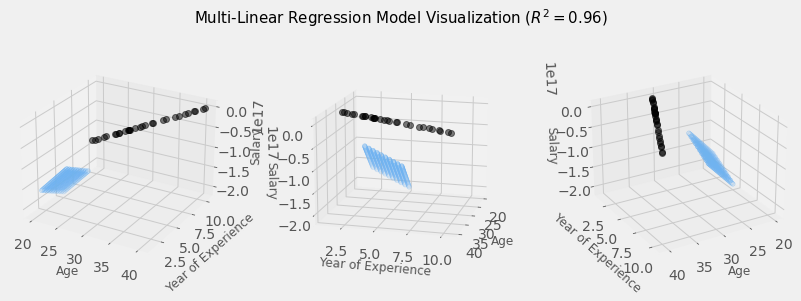

In [10]:
# Prepare data
X = df[['age', 'YearsExperience']].values.reshape(-1,2)
Y = df['Salary']

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y

xx_pred = np.linspace(20, 25, 30)  # range of age
yy_pred = np.linspace(2,5, 10)  # range of advertising values
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Predict using model built on previous step
# ols = linear_model.LinearRegression()
# model = ols.fit(X, Y)
predicted = model.predict(model_viz)

# Evaluate model by using it's R^2 score 
r2 = model.score(X, Y)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Age', fontsize=12)
    ax.set_ylabel('Year of Experience', fontsize=12)
    ax.set_zlabel('Salary', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')

fig.tight_layout()

In [11]:
X = df[['age', 'YearsExperience']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df['Salary'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           1.14e-20
Time:                        22:23:22   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -257.1114     17.220    -

In [12]:
model.coef_

array([ 1.39016886e+16, -1.39016886e+16])

In [13]:
model.intercept_

-4.170506566370116e+17

In [ ]:
model.score(x, y)


0.9563575432625312

In [ ]:
# How to plot multiple linear regraion mode
# how to test the efficancy of mode?


In [ ]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.9569566641435086


In [ ]:
#F-Test (ANOVA)

print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 622.5072026330239
Probability of observing value at least as high as F-statistic: 1.1430681092271367e-20


In [ ]:
#T-test
print(olsmod.pvalues)

const              7.319111e-15
age                3.707977e-12
YearsExperience    1.159124e-17
dtype: float64


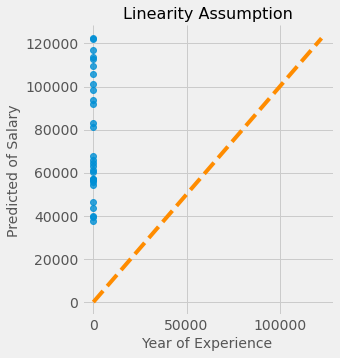

In [ ]:
# Plotting the observed vs predicted values
sns.lmplot(x='YearsExperience', y='Salary', data=df, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df[['YearsExperience', 'Salary']].min().min()-10, 
                        df[['YearsExperience', 'Salary']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted of Salary', fontsize=14)
plt.xlabel('Year of Experience', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.13649297377512515


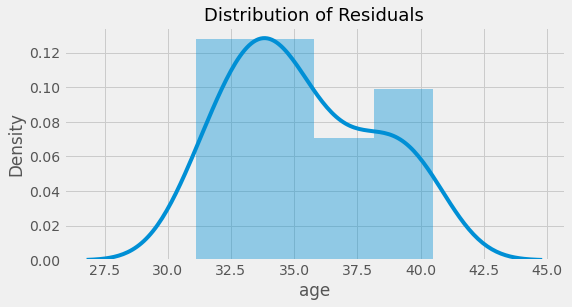

Residuals are normally distributed


In [ ]:
#Normality
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df['age'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(df['age'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

#   logistic regration

In [ ]:
# it is a type of supervised ML
# on the basis of weight you can desicide a person in weak or strong

